**Project Background:** 
This dataset is from a DataCamp project: https://www.datacamp.com/projects/184.

The data is about an A/B test with a mobile game, Cookie Cats.

**Objective:** Perform A/B test to determine if moving from Gate 30 to Gate 40 improves the retention rate (a) when assessed over 1 -Day Retention Period (b) when assessed over 7-Day Retention Period 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-games-ab-testing/cookie_cats.csv


Load the dataset to perform the analysis

In [2]:
df = pd.read_csv("/kaggle/input/mobile-games-ab-testing/cookie_cats.csv")

The code below perfoms Bootstrapping and calculates the sample mean for Gate 30 and Gate 40 for 1 Day Retention Rate and 7 Day Retention Rate

In [3]:
#Function to perform Bootstrapping
def bootstrap(data,size):
    sample_mean=[]
    for i in range(0,size):
        sample=np.random.choice(data,len(data), replace=True)
        sample_mean.append(np.mean(sample))
    
    return sample_mean    

Look at the basic characterstics of the data

In [4]:
df.shape

(90189, 5)

Find out number of unique elements for each column

In [5]:
df.nunique()

userid            90189
version               2
sum_gamerounds      942
retention_1           2
retention_7           2
dtype: int64

Check for any missing or Nans in the dataset

In [6]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [7]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


There looks to be an outlier for sum_gamerounds. Lets investigate further with visual charts

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sum_gamerounds'>

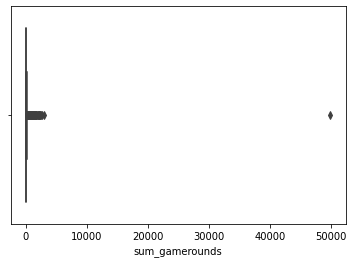

In [8]:
#Box Plot - to check for outlier
sns.boxplot(df['sum_gamerounds'])
#Clearly there exists an outlier

Box Plot shows confirms the presence of an outlier. We will also plot scatter plot to confirm our analysis

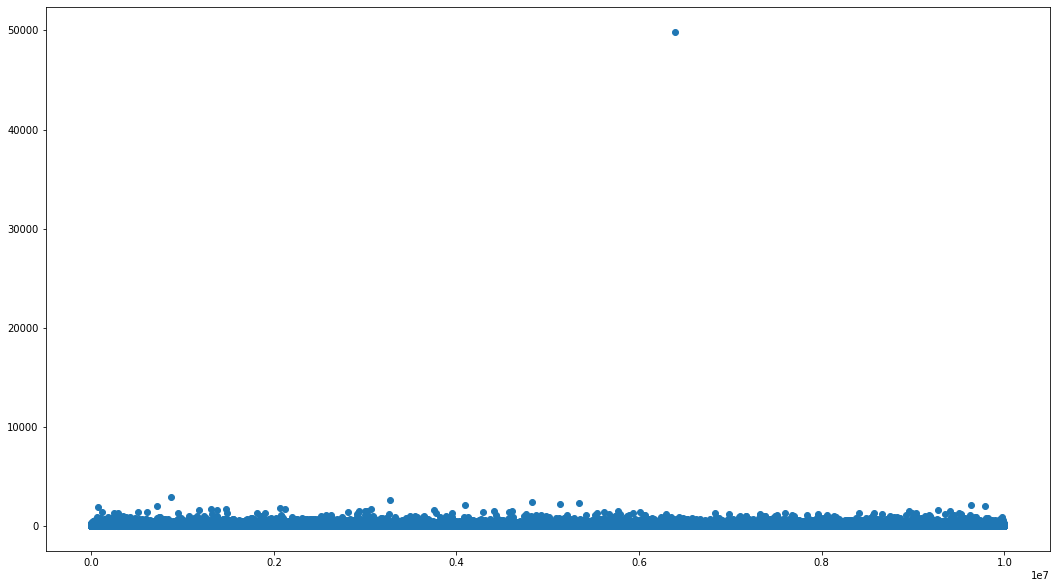

In [9]:
#Scatter Plot to confirm the outlier
fig,ax=plt.subplots(figsize =(18,10))
ax.scatter(df['userid'], df['sum_gamerounds'])
plt.show()

Based on box plot and scatter plot, there exists an outlier. We will remove the outlier using Inter-Quartile Range

In [10]:
#Determine the outlier using the InterQuartile Range
q1=np.percentile(df['sum_gamerounds'],25,interpolation = 'midpoint')
q3=np.percentile(df['sum_gamerounds'],75,interpolation = 'midpoint')
IQR=q3-q1
#Remove the outlier based on IQR Range
df1=df[(df['sum_gamerounds'] <=   (q3+ 1.5*IQR))& (df['sum_gamerounds'] >=   (q1- 1.5*IQR))]

Lets check our data again after removing the outlier

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='sum_gamerounds'>

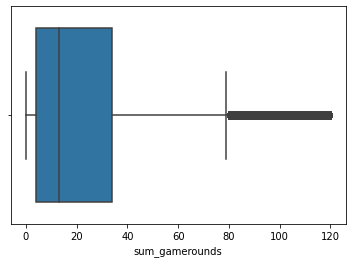

In [11]:
#Analysis after removing the outlier
df1.describe()
sns.boxplot(df1['sum_gamerounds'])

#No Outliers,though the data is right skewed

Clearly there is no outlier. Lets plot histogram as well

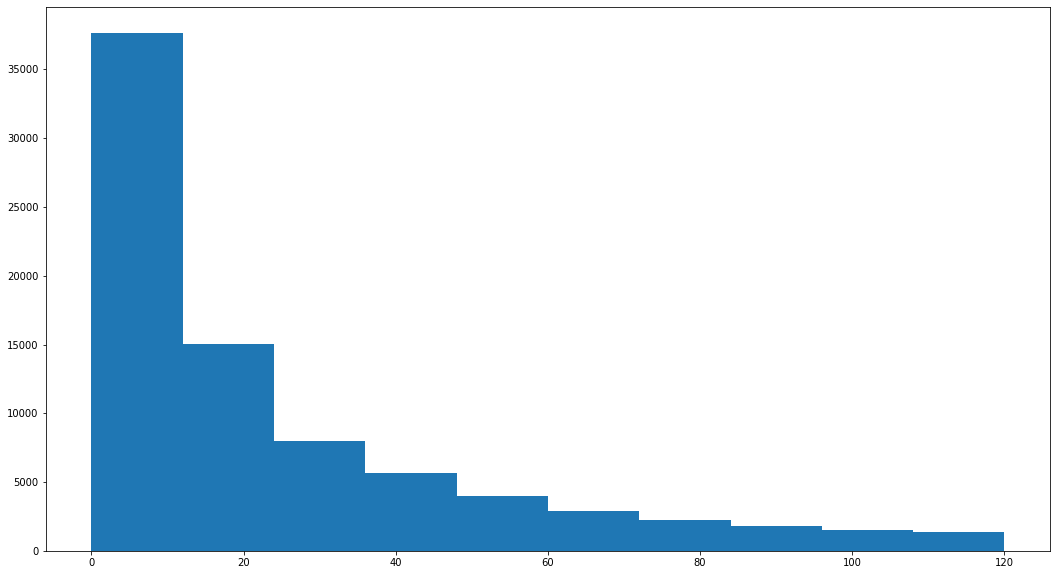

In [12]:
#Histogram to check if the variable "sum_gamerounds" is skewed
fig,ax=plt.subplots(figsize =(18,10))
ax.hist(df1['sum_gamerounds'])
plt.show()

Perfomrm the A/B testing on 1-Day Retention Rate

In [13]:
#1 Day Retention Rate Analysis
#Calculate the retention rate for the overall population for 1-day retention
rate_1= df1['retention_1'].sum()/df1['retention_1'].count()
print("Overall 1 Day Retention Rate: " "{:.3%}".format(rate_1))

Overall 1 Day Retention Rate: 38.620%


Lets calulate the 1 Day Retention Rate for Gate 30 and Gate 40 

In [14]:
#Calculate the 1-day retention rate by version
rate_1_gp = df1.groupby('version')['retention_1'].sum()/df.groupby('version')['retention_1'].count()
print("1 Day Retention Rate for Gate 30: " "{:.3%}".format(rate_1_gp[0]))
print("1 Day Retention Rate for Gate 40: " "{:.3%}".format(rate_1_gp[1]))


1 Day Retention Rate for Gate 30: 34.503%
1 Day Retention Rate for Gate 40: 34.026%


Based on 1-day Retention, the conversion rate for Gate 30 looks very much similar to Gate 40. Lets do the visual check as well 

<AxesSubplot:xlabel='version', ylabel='retention_1'>

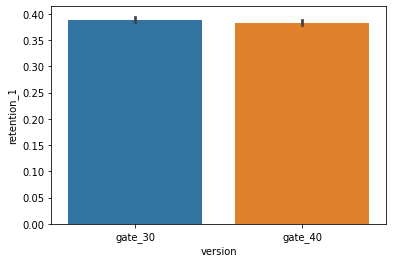

In [15]:
#Plot 1-day Retention Rate
sns.barplot(x=df1['version'],y=df1['retention_1'])


Box plot also shows the 1 Day Retention Rate to be very similar for Gate 30 vs Gate 40.
We will do A/B testing to confirm the analysis. Let's put the hypothesis before:
Null Hypothesis: 1 Day Retention Rate is same for Gate 30 and Gate 40
Alternate Hypothesis: 1 Day Retention Rate is more for Gate 30 compared to Gate 40

In [16]:
# Perform Bootstrapping on the samples for Gate_30 and Gate_40 for 1-Day Retention
gate_30_r1=df1[df1['version'] == 'gate_30']['retention_1']
gate_40_r1=df1[df1['version'] == 'gate_40']['retention_1']
gate30_r1_mean=bootstrap(gate_30_r1,100000)
gate40_r1_mean=bootstrap(gate_40_r1,100000)

In [17]:
#Perfom the comparison on the Means created from Gate 30 and Gate 40
gate30_40_r1=pd.DataFrame(columns=['Gate30_r1', 'Gate40_r1'])
gate30_40_r1['Gate30_r1'] = gate30_r1_mean
gate30_40_r1['Gate40_r1'] = gate40_r1_mean

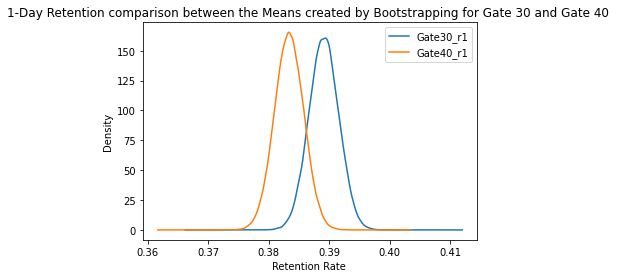

In [18]:
#Plot the Density Chart
gate30_40_r1.plot(kind='density')
plt.title("1-Day Retention comparison between the Means created by Bootstrapping for Gate 30 and Gate 40 ")
plt.xlabel("Retention Rate ")
plt.ylabel("Density")
plt.show()

The graph are very close. Lets look at the differnce as well

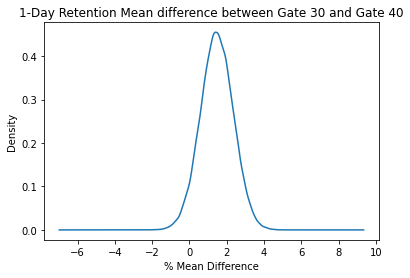

In [19]:
gate30_40_r1['diff']=100*(gate30_40_r1['Gate30_r1'] - gate30_40_r1['Gate40_r1'])/(gate30_40_r1['Gate30_r1'])
gate30_40_r1['diff'].plot(kind='density')
plt.title("1-Day Retention Mean difference between Gate 30 and Gate 40")
plt.xlabel("% Mean Difference")
plt.ylabel("Density")
plt.show()

The graph shows most of the difference between 1% - 2% for Gate 30 and Gate 40. Next step is to calculate the probability that the 1-Day Retention Rate is better for Gate 30 compared to Gate 40

In [20]:
prob_r1_30_40= ((gate30_40_r1['diff'] >0).sum())/(gate30_40_r1['diff'].count())
print("Probability that 1 Day Retention Rate is better for Gate 30 compared to Gate 40:", "{:.3%}".format(prob_r1_30_40))


Probability that 1 Day Retention Rate is better for Gate 30 compared to Gate 40: 95.235%


There is 95.27% probability that 1 Day Retention Rate is better for Gate 30 compared to Gate 40. At 5% and 1% alpha, we fail to reject the Null Hypothesis that 1 Day Retention Rate is same for Gate 30 and Gate 40

We will repeat the above analysis for 7 Day Retention Rate

In [21]:
#7 Day Retention Rate Analysis
#Calculate the retention rate for the overall population for 7-day retention
rate_7= df1['retention_7'].sum()/df1['retention_7'].count()
print("Overall 7 Day Retention Rate: " "{:.3%}".format(rate_7))

Overall 7 Day Retention Rate: 11.392%


In [22]:
#Calculate the 7-day retention rate by version
rate_7_gp= df1.groupby('version')['retention_7'].sum()/df.groupby('version')['retention_7'].count()
print("7 Day Retention Rate for Gate 30: " "{:.3%}".format(rate_7_gp[0]))
print("7 Day Retention Rate for Gate 40: " "{:.3%}".format(rate_7_gp[1]))


7 Day Retention Rate for Gate 30: 10.474%
7 Day Retention Rate for Gate 40: 9.745%


Based on 7-day Retention, the conversion rate for Gate 30 looks better than Gate 40. We will do the visual check to confirm our results

<AxesSubplot:xlabel='version', ylabel='retention_7'>

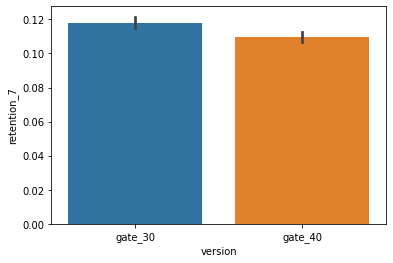

In [23]:
#plot the retention rate
sns.barplot(x=df1['version'], y=df1['retention_7'])

In [24]:
# Perform Bootstrapping on the samples for Gate_30 and Gate_40 for 7-Day Retention
gate_30_r7=df1[df1['version'] == 'gate_30']['retention_7']
gate_40_r7=df1[df1['version'] == 'gate_40']['retention_7']

gate30_r7_mean=bootstrap(gate_30_r7,100000)
gate40_r7_mean=bootstrap(gate_40_r7,100000)

In [25]:
#Perfom the comparison on the Means created from Gate 30 and Gate 40
gate30_40_r7=pd.DataFrame(columns=['Gate30_r7','Gate40_r7'])
gate30_40_r7['Gate30_r7']=gate30_r7_mean
gate30_40_r7['Gate40_r7']=gate40_r7_mean


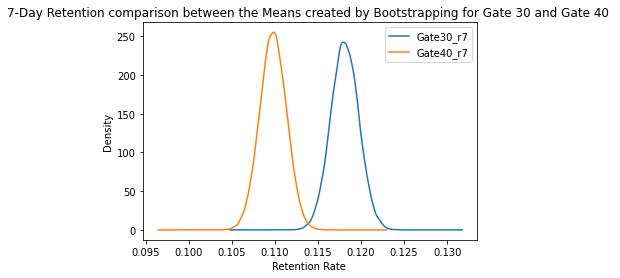

In [26]:
#Plot the Density Chart
gate30_40_r7.plot(kind='density')
plt.title("7-Day Retention comparison between the Means created by Bootstrapping for Gate 30 and Gate 40 ")
plt.xlabel("Retention Rate ")
plt.ylabel("Density")
plt.show()

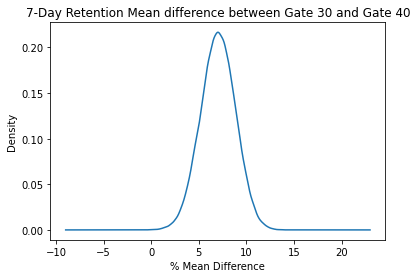

In [27]:
gate30_40_r7['diff']=100*(gate30_40_r7['Gate30_r7'] - gate30_40_r7['Gate40_r7'])/(gate30_40_r7['Gate30_r7'])

#Plot the Density Chart
gate30_40_r7['diff'].plot(kind='density')
plt.title("7-Day Retention Mean difference between Gate 30 and Gate 40")
plt.xlabel("% Mean Difference")
plt.ylabel("Density")
plt.show()

The graph shows most of the difference between 5% - 8% for Gate 30 and Gate 40. Next step is to calculate the probability that the 7-Day Retention Rate is better for Gate 30 compared to Gate 40

In [28]:
prob_r7_30_40= ((gate30_40_r7['diff'] >0).sum())/(gate30_40_r7['diff'].count())
print("Probability that 7 Day Retention Rate is better for Gate 30 compared to Gate 40:", "{:.3%}".format(prob_r7_30_40))



Probability that 7 Day Retention Rate is better for Gate 30 compared to Gate 40: 99.989%


There is 99.97% probability that 7 Day Retention Rate is better for Gate 30 compared to Gate 40. At 5% and 1% alpha, we reject the Null Hypothesis that 7 Day Retention Rate is same for Gate 30 and Gate 40

**Conclusion**: Based on the above analysis, it can be concluded that Gate 30 provided better Retention Rate compared to Gate 40 when compared for 7-Day Retention Rate.